<a href="https://colab.research.google.com/github/Mohamed01555/Adult-income/blob/master/Vision%20Transformer%20for%20X-ray%20chest%20images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset from Kaggle

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as op
op.download('https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset')

100%|██████████| 1.19G/1.19G [00:53<00:00, 23.7MB/s]


# Installing dependences

In [ ]:
!pip install datasets[vision]
!pip install transformers==4.24.0 datasets==2.7.1 evaluate==0.3.0 gradio==3.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# Split data to Pnemonia and Normal

## Merge all dataset

In [ ]:
import pandas as pd
import os
import shutil

In [ ]:
meta = pd.read_csv('/content/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')
meta

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [ ]:
training_data_path = '/content/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
test_data_path = '/content/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

## split data into train and test them merge them into '/content/data'

In [ ]:
train = meta[meta.Dataset_type=='TRAIN']  
test = meta[meta.Dataset_type=='TEST']

In [ ]:
path = '/content/data'
isExist = os.path.exists(path)
if not isExist:
# Create a new directory because it does not exist
    os.makedirs(path)
for img in train['X_ray_image_name']:
    image = os.path.join(training_data_path, str(img))
    shutil.copy(str(image), '/content/data')

In [ ]:
path = '/content/data'
isExist = os.path.exists(path)
if not isExist:
# Create a new directory because it does not exist
    os.makedirs(path)
for img in test['X_ray_image_name']:
    image = os.path.join(test_data_path, str(img))
    shutil.copy(str(image), '/content/data')

In [ ]:
t = !ls '/content/data'
len(t)

5910

## split data intp pnemonia and normal

In [ ]:
Pnemonia = meta[meta['Label']=='Pnemonia']  
Normal = meta[meta['Label']=='Normal']

In [ ]:
Normal

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5515,5538,NORMAL2-IM-0341-0001.jpeg,Normal,TEST,NaN,NaN
5516,5539,NORMAL2-IM-0340-0001.jpeg,Normal,TEST,NaN,NaN
5517,5540,NORMAL2-IM-0339-0001.jpeg,Normal,TEST,NaN,NaN
5518,5541,NORMAL2-IM-0338-0001.jpeg,Normal,TEST,NaN,NaN


## Put p class into /content/data1/p

In [ ]:
for image in Pnemonia['X_ray_image_name']:
    
    p = os.path.join('/content/data', str(image))

    path = "/content/data1/p"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
    # Create a new directory because it does not exist
        os.makedirs(path)
    shutil.copy(p, path)


## Put n class into /content/data1/n

In [ ]:
for image in Normal['X_ray_image_name']:
    p = os.path.join('/content/data', str(image))
    path = "/content/data1/n"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
    # Create a new directory because it does not exist
        os.makedirs(path)
    shutil.copy(p, path)


# preprocess dataset with Huggingface load_dataset class

In [ ]:
from datasets import load_dataset

ds = load_dataset("imagefolder", data_dir="/content/data1")

Resolving data files:   0%|          | 0/5910 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-5f3ee3f477d2ed4b/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5910
    })
})

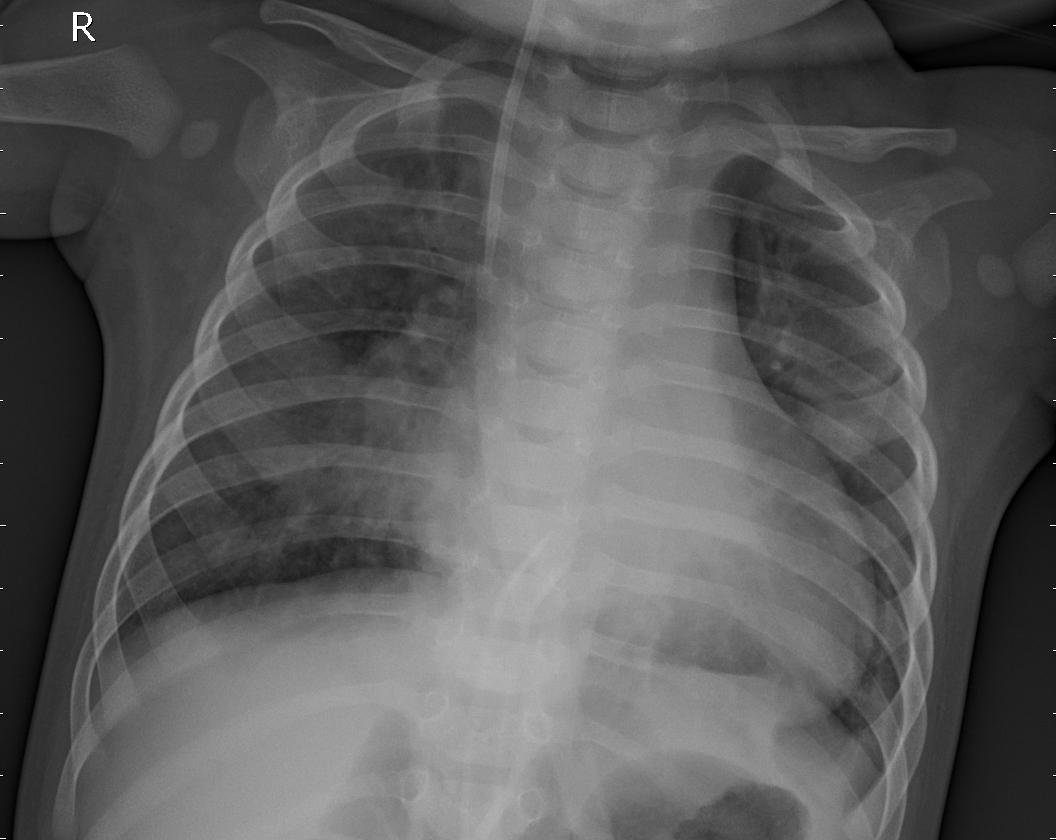

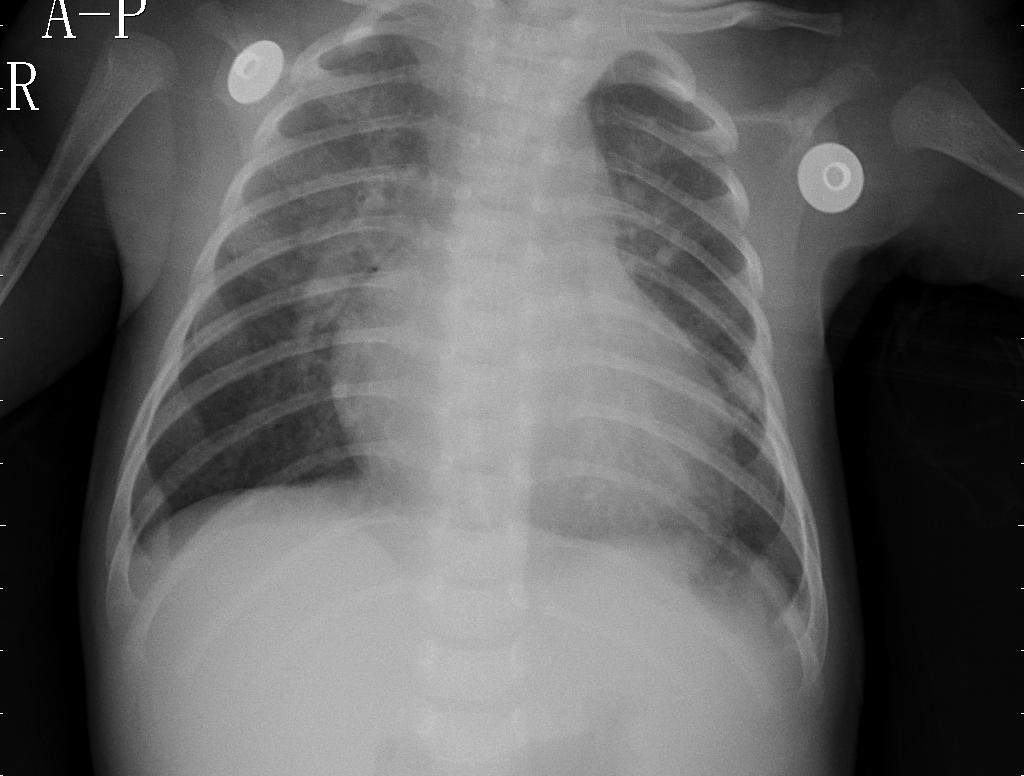

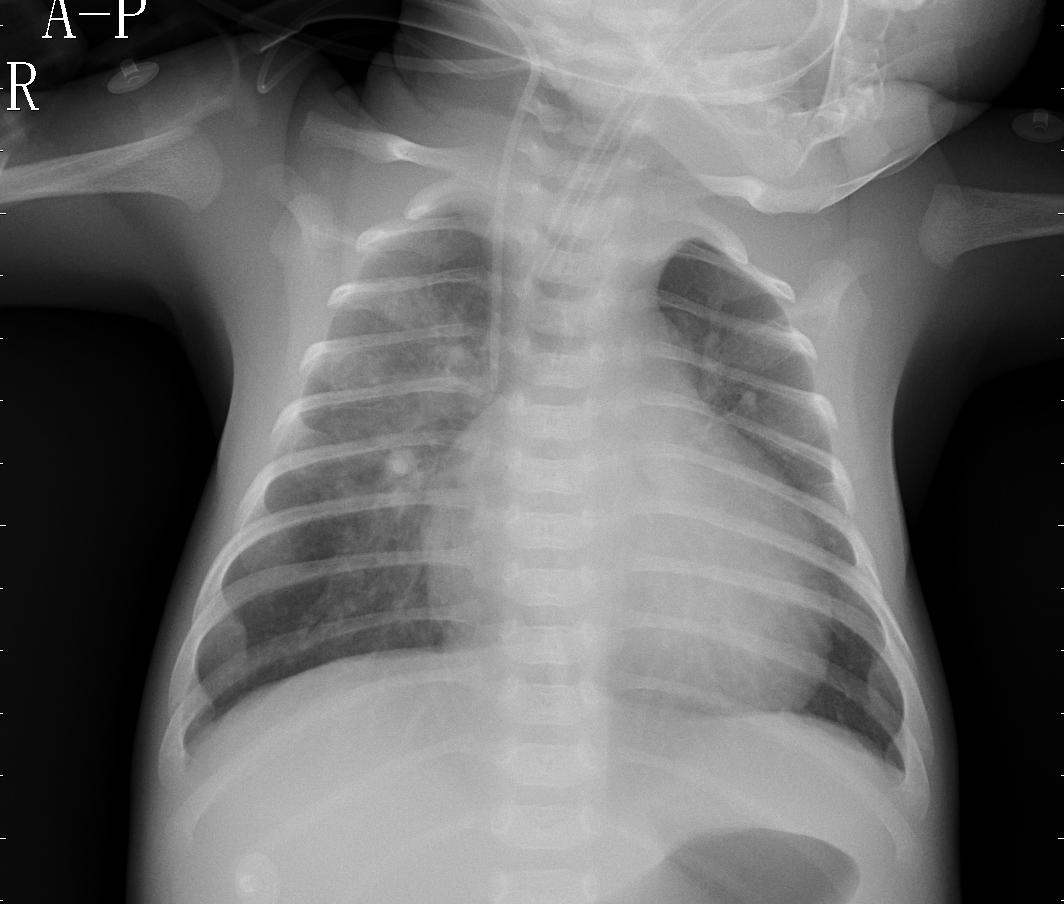

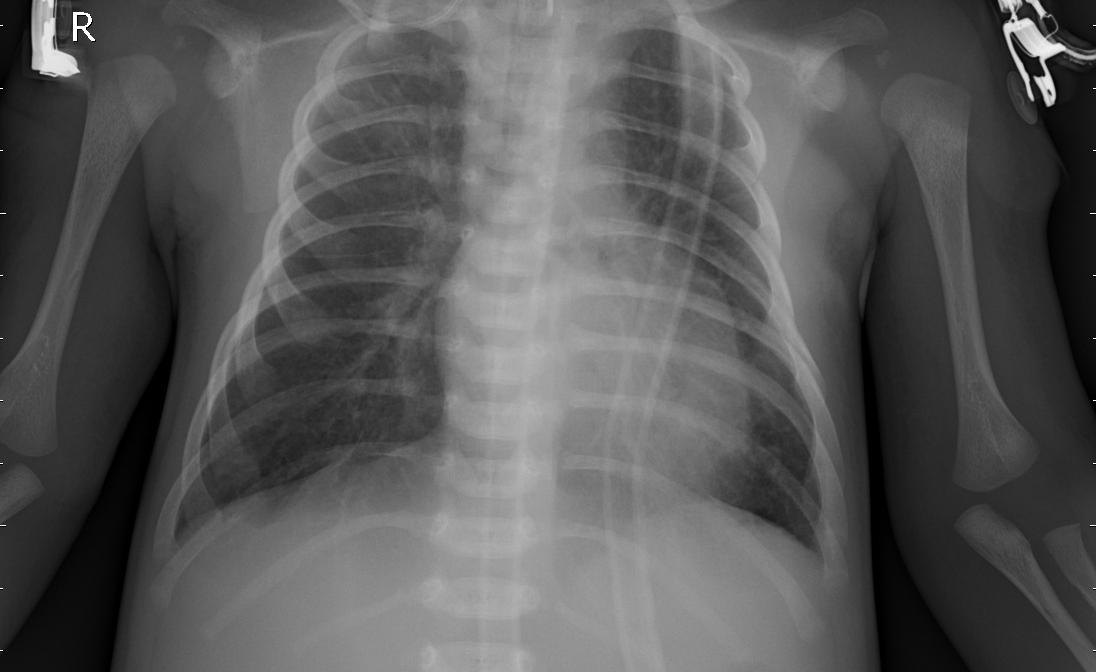

In [ ]:
for i in range(5000,5004):
  display(ds['train'][i]['image'])

In [ ]:
labels = ds['train'].features['label'].names
labels

['n', 'p']

In [ ]:
ds_train_validation = ds['train'].train_test_split(test_size= 0.1, seed=1, shuffle=True)
ds_train_validation

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5319
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 591
    })
})

In [ ]:
ds_train_validation['validation'] = ds_train_validation.pop('test')
ds_train_validation

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5319
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 591
    })
})

In [ ]:
ds.update(ds_train_validation)
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5319
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 591
    })
})

In [ ]:
ds_train_test = ds['train'].train_test_split(test_size = 0.1, seed=1, shuffle=True)
ds.update(ds_train_test)


## Using a pre-trained model without fine-tuning

In [ ]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import torch

model_id = 'google/vit-base-patch16-224'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AutoModelForImageClassification.from_pretrained(model_id).to(device)

model.eval()

In [ ]:
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [ ]:
import PIL
import numpy as np

train_image_id = 3
one_image = ds['train'][train_image_id]['image']
np.array(one_image.convert('RGB')).shape, np.array(one_image).shape

((688, 1088, 3), (688, 1088))

In [ ]:
inp = feature_extractor(images=one_image.convert('RGB'), return_tensors='pt')
inp

{'pixel_values': tensor([[[[ 0.2157,  0.1686,  0.1373,  ..., -0.7961, -0.7804, -0.7490],
          [ 0.2000,  0.1608,  0.1451,  ..., -0.7961, -0.7647, -0.7333],
          [ 0.1922,  0.1686,  0.1137,  ..., -0.7804, -0.7569, -0.7490],
          ...,
          [-0.6863, -0.6863, -0.6863,  ..., -0.7020, -0.7020, -0.7020],
          [-0.6863, -0.6863, -0.6863,  ..., -0.7020, -0.7020, -0.7020],
          [-0.6863, -0.6863, -0.6863,  ..., -0.7020, -0.7020, -0.7020]],

         [[ 0.2157,  0.1686,  0.1373,  ..., -0.7961, -0.7804, -0.7490],
          [ 0.2000,  0.1608,  0.1451,  ..., -0.7961, -0.7647, -0.7333],
          [ 0.1922,  0.1686,  0.1137,  ..., -0.7804, -0.7569, -0.7490],
          ...,
          [-0.6863, -0.6863, -0.6863,  ..., -0.7020, -0.7020, -0.7020],
          [-0.6863, -0.6863, -0.6863,  ..., -0.7020, -0.7020, -0.7020],
          [-0.6863, -0.6863, -0.6863,  ..., -0.7020, -0.7020, -0.7020]],

         [[ 0.2157,  0.1686,  0.1373,  ..., -0.7961, -0.7804, -0.7490],
          [ 0

In [ ]:
outp = model(**inp)
outp    

RuntimeError: ignored

In [ ]:
outp.logits.shape

In [ ]:
torch.argmax(outp.logits, dim=1)

In [ ]:
pred = torch.argmax(outp.logits, dim=1).item()
pred

In [ ]:
model.config.id2label[pred]


It seems like we want to retrain our model on our costum dataset

# Fine tuning ViT

In [ ]:
labels = ds['train'].features['label'].names

In [ ]:
label2id = {key:value for key,value in enumerate(labels)}
id2label = {value:key for key,value in enumerate(labels)}

In [ ]:
model = AutoModelForImageClassification.from_pretrained(model_id, num_labels = len(labels), id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## preprocess images

In [ ]:
import torchvision

from torchvision.transforms import (
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    ToTensor,
    Resize,
    CenterCrop
)

In [ ]:
normalize = Normalize(feature_extractor.image_mean, std = feature_extractor.image_std)

In [ ]:
feature_extractor.size

224

In [ ]:
train_transform = Compose(
    [
     RandomResizedCrop(feature_extractor.size),
     RandomHorizontalFlip(),
     ToTensor(),
     normalize
    ]
)

validation_transform = Compose(
        [
            Resize(feature_extractor.size),
            CenterCrop(feature_extractor.size),
            ToTensor(),
            normalize,
        ]
    )

def train_transform_images(images):
  images["pixel_values"] = [train_transform(image.convert("RGB")) for image in images["image"]]
  
  return images

def validation_transform_images(images):
  images["pixel_values"] = [validation_transform(image.convert("RGB")) for image in images["image"]]
  return images

In [ ]:
transformed_ds = ds.with_transform(train_transform_images)

transformed_ds['train'] = ds['train'].with_transform(train_transform_images)

transformed_ds['validation'] = ds['validation'].with_transform(validation_transform_images)

transformed_ds['test'] = ds['test'].with_transform(validation_transform_images)

In [ ]:
e = transformed_ds['train'][0]
e

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1268x959 at 0x7F18986B09A0>,
 'label': 1,
 'pixel_values': tensor([[[-0.1059, -0.0275,  0.0039,  ..., -0.4039, -0.3961, -0.3961],
          [-0.0902, -0.0196, -0.0118,  ..., -0.4275, -0.3882, -0.3804],
          [-0.0902, -0.0431, -0.0196,  ..., -0.4196, -0.3961, -0.3804],
          ...,
          [-0.9529, -0.8824, -0.8118,  ...,  0.1686,  0.1451,  0.1216],
          [-0.9451, -0.8902, -0.8196,  ...,  0.1765,  0.1451,  0.0980],
          [-0.9451, -0.8745, -0.8118,  ...,  0.1843,  0.1529,  0.1059]],
 
         [[-0.1059, -0.0275,  0.0039,  ..., -0.4039, -0.3961, -0.3961],
          [-0.0902, -0.0196, -0.0118,  ..., -0.4275, -0.3882, -0.3804],
          [-0.0902, -0.0431, -0.0196,  ..., -0.4196, -0.3961, -0.3804],
          ...,
          [-0.9529, -0.8824, -0.8118,  ...,  0.1686,  0.1451,  0.1216],
          [-0.9451, -0.8902, -0.8196,  ...,  0.1765,  0.1451,  0.0980],
          [-0.9451, -0.8745, -0.8118,  ...,  0.1843,  

In [ ]:
sample_image = transformed_ds['train'][0]['pixel_values']
np.array(sample_image).shape

(3, 224, 224)

In [ ]:
# # Re-run cell multiple times (train_transform)
# import matplotlib.pyplot as plt
# transformed_sample_image = train_transform(sample_image)
# plt.imshow(transformed_sample_image.permute(1, 2, 0))

In [ ]:
# transformed_sample_image.shape

In [ ]:
four_images = [transformed_ds['train'][i] for i in range(4)]
four_images

[{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1268x959 at 0x7F18986B04C0>,
  'label': 1,
  'pixel_values': tensor([[[-0.2157, -0.2235, -0.2471,  ..., -0.9765, -0.9922, -1.0000],
           [-0.2392, -0.2471, -0.2627,  ..., -0.9686, -0.9765, -0.9922],
           [-0.2706, -0.2784, -0.2627,  ..., -0.9843, -0.9922, -1.0000],
           ...,
           [ 0.4196,  0.3961,  0.4039,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.4039,  0.3961,  0.4353,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.4275,  0.4118,  0.4196,  ..., -1.0000, -1.0000, -1.0000]],
  
          [[-0.2157, -0.2235, -0.2471,  ..., -0.9765, -0.9922, -1.0000],
           [-0.2392, -0.2471, -0.2627,  ..., -0.9686, -0.9765, -0.9922],
           [-0.2706, -0.2784, -0.2627,  ..., -0.9843, -0.9922, -1.0000],
           ...,
           [ 0.4196,  0.3961,  0.4039,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.4039,  0.3961,  0.4353,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.4275,  0.4118,  0.4196,

In [ ]:
print(four_images[0]['pixel_values'].shape, four_images[1]['pixel_values'].shape, four_images[2]['pixel_values'].shape, four_images[3]['pixel_values'].shape)

torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) torch.Size([3, 224, 224])


In [ ]:
four_images_labels = [image['label'] for image in four_images]
four_images_labels

[1, 1, 0, 1]

In [ ]:
import torch
four_images_labels = torch.tensor([image['label'] for image in four_images])
four_images_labels

tensor([1, 1, 0, 1])

In [ ]:
#will get an error
four_images_pixel_values = torch.tensor([image['pixel_values'] for image in four_images])
four_images_pixel_values

ValueError: ignored

In [ ]:
#will get an error
four_images_pixel_values = torch.cat([image['pixel_values'] for image in four_images])
four_images_pixel_values

tensor([[[-0.2157, -0.2235, -0.2471,  ..., -0.9765, -0.9922, -1.0000],
         [-0.2392, -0.2471, -0.2627,  ..., -0.9686, -0.9765, -0.9922],
         [-0.2706, -0.2784, -0.2627,  ..., -0.9843, -0.9922, -1.0000],
         ...,
         [ 0.4196,  0.3961,  0.4039,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.4039,  0.3961,  0.4353,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.4275,  0.4118,  0.4196,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.2157, -0.2235, -0.2471,  ..., -0.9765, -0.9922, -1.0000],
         [-0.2392, -0.2471, -0.2627,  ..., -0.9686, -0.9765, -0.9922],
         [-0.2706, -0.2784, -0.2627,  ..., -0.9843, -0.9922, -1.0000],
         ...,
         [ 0.4196,  0.3961,  0.4039,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.4039,  0.3961,  0.4353,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.4275,  0.4118,  0.4196,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.2157, -0.2235, -0.2471,  ..., -0.9765, -0.9922, -1.0000],
         [-0.2392, -0.2471, -0.2627,  ..., -0

In [ ]:
four_images_pixel_values.shape

torch.Size([12, 224, 224])

In [ ]:
four_images_pixel_values = torch.stack([image['pixel_values'] for image in four_images])
four_images_pixel_values.shape

torch.Size([4, 3, 224, 224])

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(images):
  labels = torch.tensor([image['label'] for image in images])
  pixel_values = torch.stack([image['pixel_values'] for image in images])
  return {'pixel_values': pixel_values, 'labels': labels}

train_dataloader = DataLoader(transformed_ds['train'], batch_size=4, collate_fn=collate_fn, shuffle=True)
validation_dataloader = DataLoader(transformed_ds['validation'], batch_size=4, collate_fn=collate_fn, shuffle=False)
test_dataloader = DataLoader(transformed_ds['test'], batch_size=4, collate_fn=collate_fn, shuffle=False)

In [ ]:
batch = next(iter(train_dataloader))

for key, value in batch.items():
  print(key, value.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


In [ ]:
model.base_model.parameters()

<generator object Module.parameters at 0x7f195dad6f90>

In [ ]:

for param in model.base_model.parameters():
    param.requires_grad = False

In [ ]:
from transformers import TrainingArguments, Trainer

batch_size=32
metric_name = "accuracy"
model_name = 'vit-base-patch16-224-finetuned-corona'

args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs', 
    push_to_hub=True
)

In [ ]:
args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs', 
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_ds['train'],
    eval_dataset=transformed_ds['validation'],
    tokenizer=feature_extractor,
    data_collator=collate_fn,
)

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4787
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 150
  Number of trainable parameters = 1538


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=150, training_loss=0.5774231465657552, metrics={'train_runtime': 125.4225, 'train_samples_per_second': 38.167, 'train_steps_per_second': 1.196, 'total_flos': 3.709541542850519e+17, 'train_loss': 0.5774231465657552, 'epoch': 1.0})

In [ ]:
o = trainer.predict(transformed_ds['test'])


***** Running Prediction *****
  Num examples = 532
  Batch size = 32


NameError: ignored

In [ ]:
def compute_metrics(batch):
  return metric.compute(
      references=batch.label_ids,
      predictions=np.argmax(batch.predictions, axis=1))
compute_metrics(o)

{'accuracy': 0.7218045112781954}

In [ ]:
import evaluate
import numpy as np

metric = evaluate.load('accuracy')

def compute_metrics(batch):
  return metric.compute(
      references=batch.label_ids,
      predictions=np.argmax(batch.predictions, axis=1))

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/

In [ ]:
args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=50,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs', 
    # push_to_hub=True
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_ds['train'],
    eval_dataset=transformed_ds['validation'],
    tokenizer=feature_extractor,
    data_collator=collate_fn,
    compute_metrics=compute_metrics
)

using `logging_steps` to initialize `eval_steps` to 500
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer.train()
trainer.save_model()

***** Running training *****
  Num examples = 4787
  Num Epochs = 50
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 7500
  Number of trainable parameters = 1538


Step,Training Loss,Validation Loss,Accuracy
500,0.441000,0.356386,0.901861
1000,0.354600,0.308624,0.912014
1500,0.314500,0.278097,0.918782
2000,0.298200,0.267894,0.913706
2500,0.279600,0.257998,0.906937
3000,0.272600,0.250961,0.906937
3500,0.266900,0.240542,0.913706
4000,0.261000,0.236777,0.913706
4500,0.256100,0.236313,0.915398
5000,0.255900,0.231923,0.915398


***** Running Evaluation *****
  Num examples = 591
  Batch size = 32
Saving model checkpoint to vit-base-patch16-224-finetuned-corona/checkpoint-500
Configuration saved in vit-base-patch16-224-finetuned-corona/checkpoint-500/config.json
Model weights saved in vit-base-patch16-224-finetuned-corona/checkpoint-500/pytorch_model.bin
Feature extractor saved in vit-base-patch16-224-finetuned-corona/checkpoint-500/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 591
  Batch size = 32
Saving model checkpoint to vit-base-patch16-224-finetuned-corona/checkpoint-1000
Configuration saved in vit-base-patch16-224-finetuned-corona/checkpoint-1000/config.json
Model weights saved in vit-base-patch16-224-finetuned-corona/checkpoint-1000/pytorch_model.bin
Feature extractor saved in vit-base-patch16-224-finetuned-corona/checkpoint-1000/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 591
  Batch size = 32
Saving model checkpoint to vit-base-patch16-224-fine

In [ ]:
trainer.evaluate(transformed_ds['train'])

In [ ]:
trainer.evaluate(transformed_ds['validation'])

In [ ]:
trainer.evaluate(transformed_ds['test'])